<a href="https://colab.research.google.com/github/AgustinSiben/AprMaq/blob/main/Trabajo_practico_4_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diagnóstico de cáncer de mama utilizando perceptrones
El objetivo de este proyecto es construir un modelo capaz de predecir el diagnóstico de tejidos de cáncer de mama como malignos o benignos. Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA, por sus siglas en inglés) de una masa mamaria. Describen características de los núcleos celulares presentes en la imagen. Distribución de clases: 357 benignas, 212 malignas.

##Librerías utilizadas

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC 
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import plot_confusion_matrix

##Obtengo los datos
Quito una columna inecesaria y acomodo la columna que será la target

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


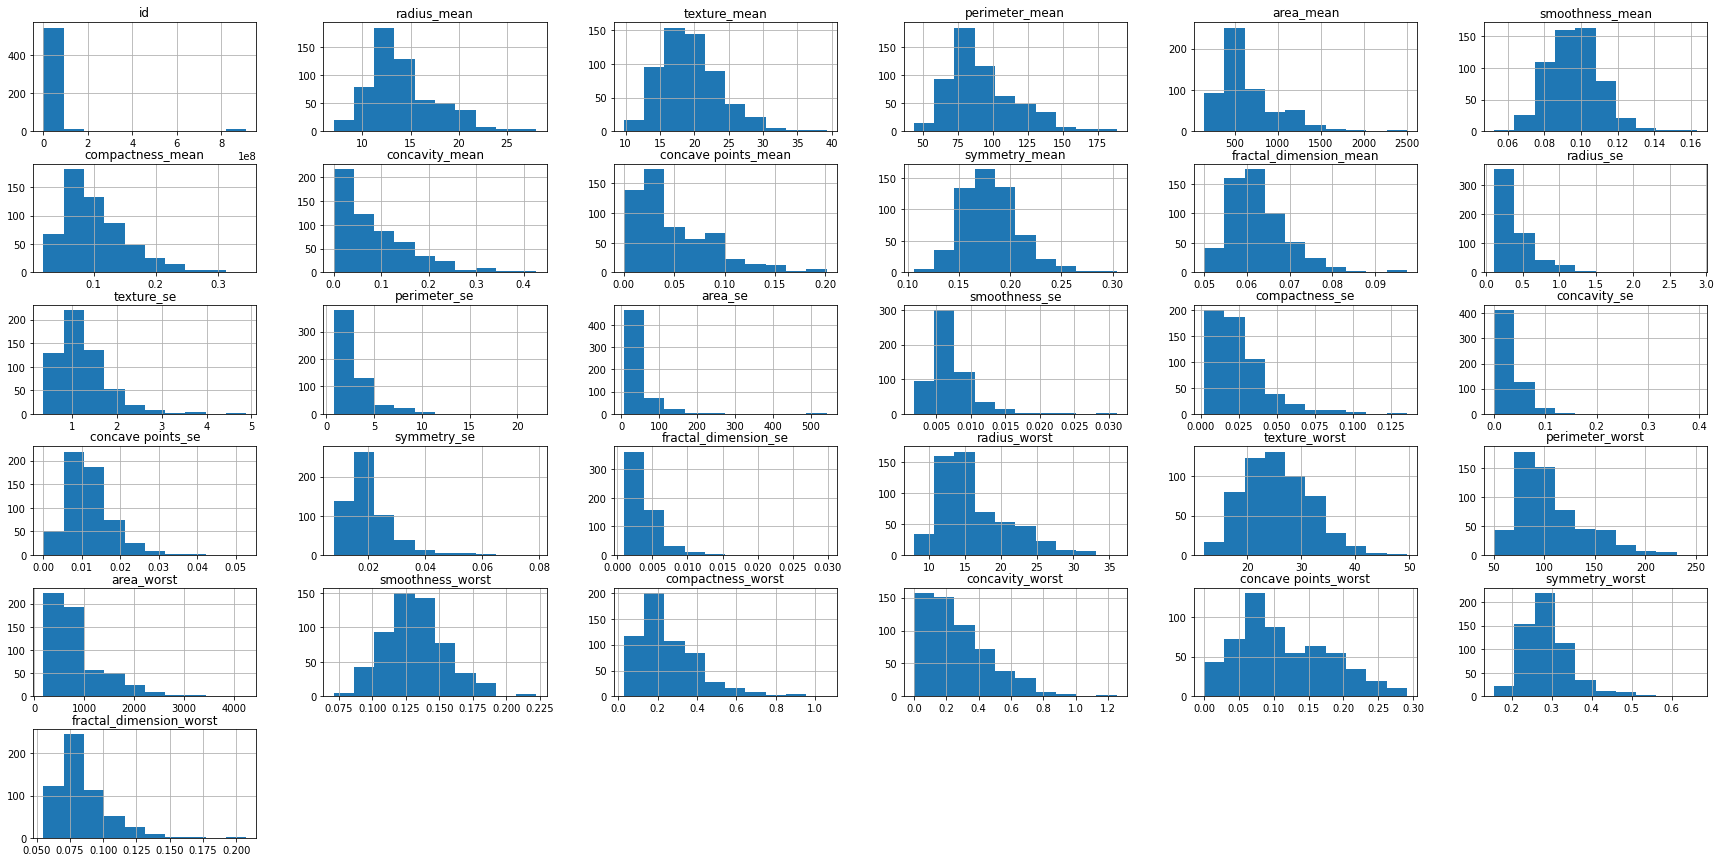

In [149]:
cancer_tissues = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")
del cancer_tissues['Unnamed: 32']
cancer_tissues.hist(figsize=(30,15))
cancer_tissues.head()

## Genero mis datos de entrenamiento y target
Estandarizo los parámetros para mejorar el valor de los datos y doy valor numerico al target.

In [150]:
X = cancer_tissues.copy()
y = X['diagnosis']
y = np.where(y=='B', 1, 0) #1 corresponde a Benigno y 0 a maligno
del X['diagnosis']
Sc = StandardScaler()
X = Sc.fit_transform(X)

##Creo el clasificador utilizando perceptrones y lo entreno


El clasificador tiene una puntuacíon: 97.89 %



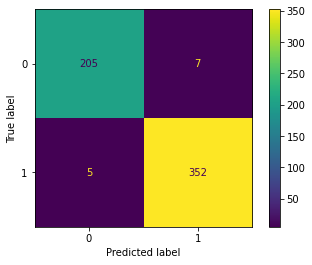

In [151]:
clf = Perceptron()
clf.fit(X, y)
plot_confusion_matrix(clf, X, y,values_format='d')
print('El clasificador tiene una puntuacíon:',round(clf.score(X, y)*100,2),'%\n')

##Creo otro calsificador para compararlos
En este caso uso Support Vector Classification

El clasificador tiene una puntuacíon: 98.77 %



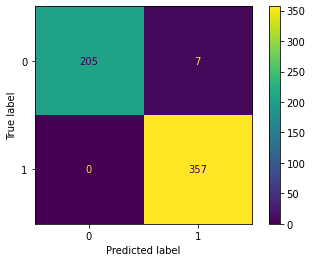

In [152]:
svc = SVC(C=1.0, kernel = 'rbf', class_weight = None , max_iter = - 1)
svc.fit(X,y)
plot_confusion_matrix(svc, X, y,values_format='d')
print('El clasificador tiene una puntuacíon:',round(svc.score(X, y)*100,2),'%\n')

## Se puede observar que ambos clasificadores funcionan bien
Para agregar un par de pruebas veo como se modifica la puntuación ingresando menos datos

,Datos usados,Puntuación [%]
0,100% de los datos,98.42
1,50% de los datos,98.07
2,25% de los datos,96.31
3,10% de los datos,96.13
4,5% de los datos,86.99


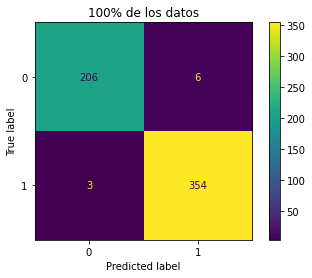

<Figure size 432x288 with 0 Axes>

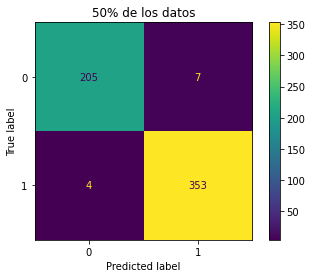

<Figure size 432x288 with 0 Axes>

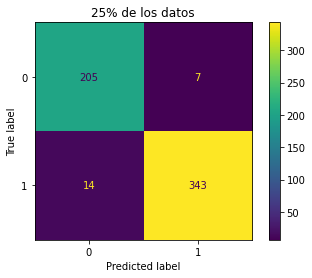

<Figure size 432x288 with 0 Axes>

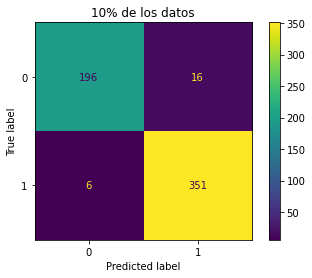

<Figure size 432x288 with 0 Axes>

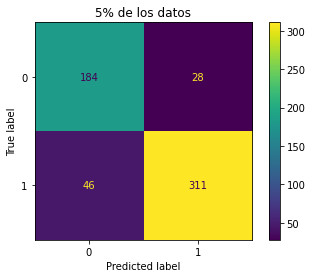

<Figure size 432x288 with 0 Axes>

In [153]:
porcentajes = [1,2,4,10,20]
scores = [0,0,0,0,0]
titulos = ['100% de los datos','50% de los datos','25% de los datos','10% de los datos','5% de los datos']

for i in range(5):
    X_sample = cancer_tissues.sample(int(len(cancer_tissues)/porcentajes[i]))
    y_sample = X_sample['diagnosis']
    y_sample = np.where(y_sample=='B', 1, 0) #1 corresponde a Benigno y 0 a maligno
    del X_sample['diagnosis']
    Sc = StandardScaler()
    X_sample = Sc.fit_transform(X_sample)
    clf.fit(X_sample, y_sample)
    plot_confusion_matrix(clf, X, y,values_format='d')
    plt.title(titulos[i])
    plt.figure()
    scores[i]=round(clf.score(X, y)*100,2)

resultados = pd.DataFrame({'Datos usados':titulos,'Puntuación [%]':scores})
resultados